## 重要参数
### **criterion** : gini, entropy

In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [4]:
import pandas as pd
data = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  0       178 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


### 分割训练集、测试集
- test_size

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

### 训练模型

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) # 返回预测的精准度accuracy

In [19]:
score

0.9444444444444444

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 绘制Tree

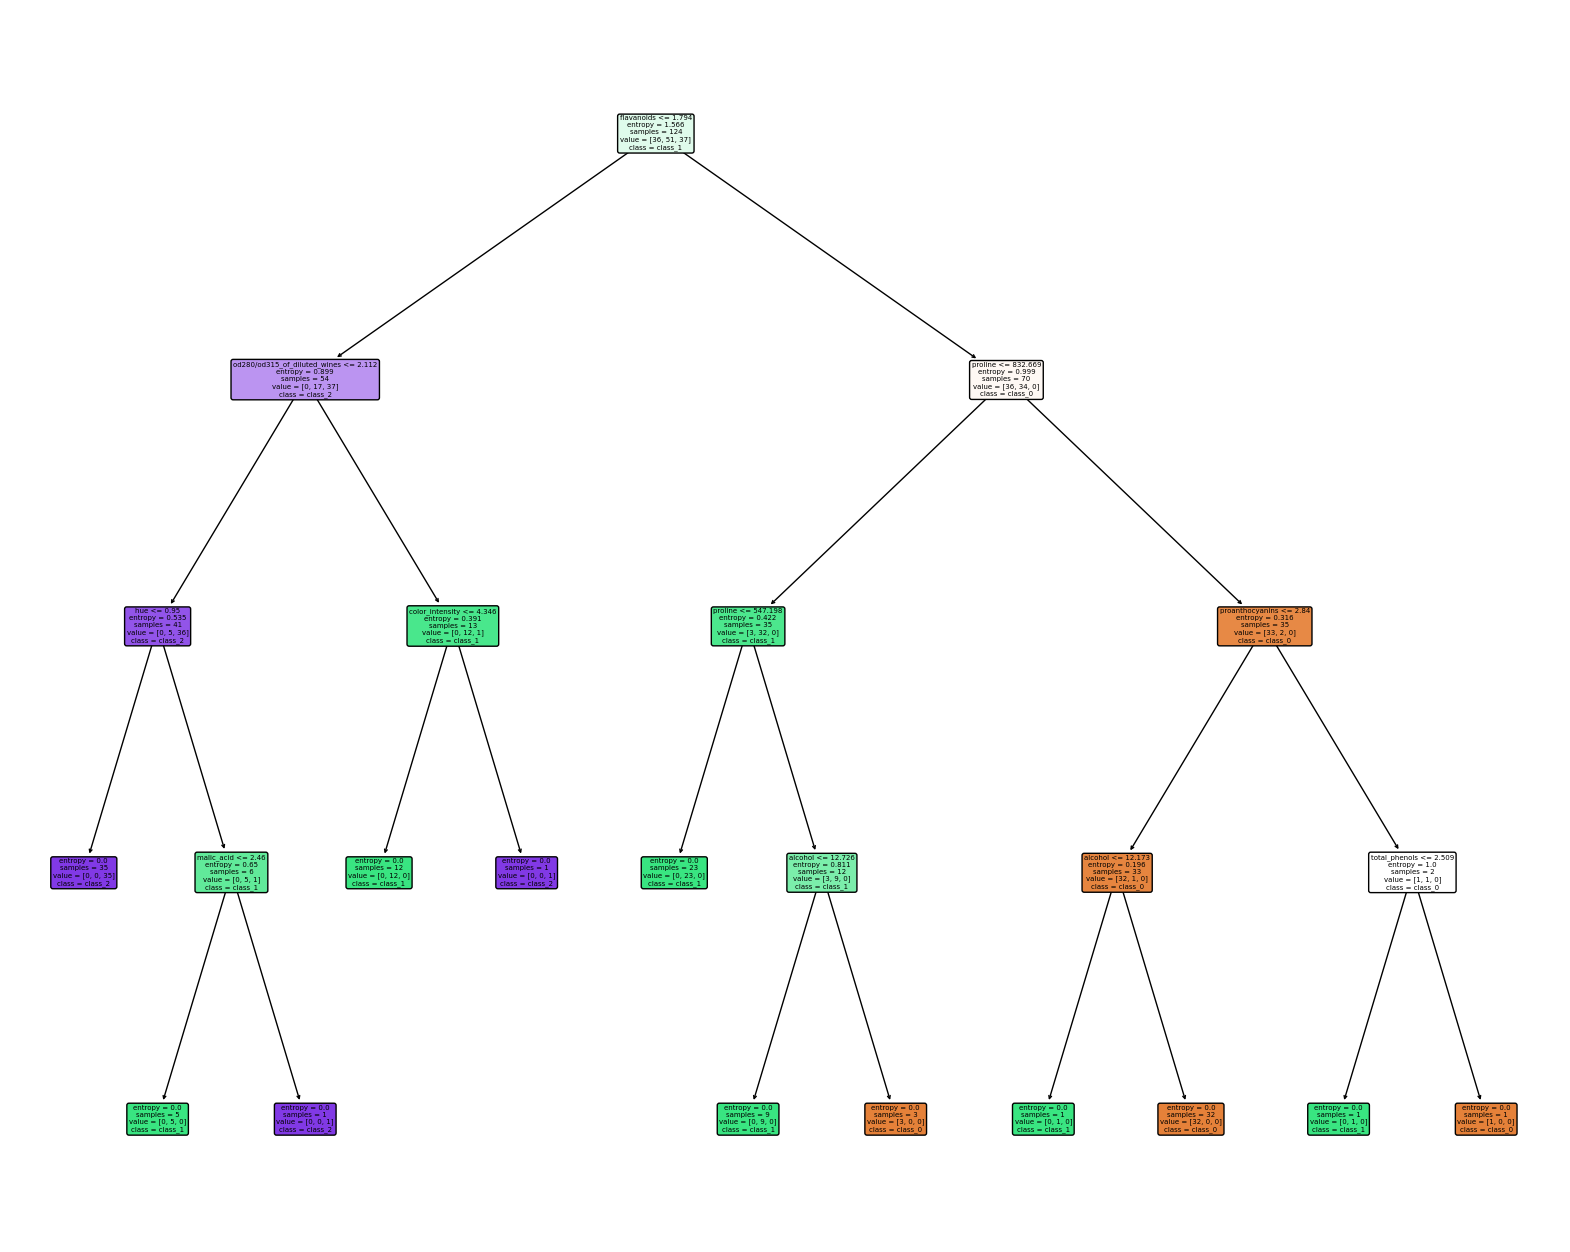

In [20]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,16))
_ = tree.plot_tree(
    clf,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True,
    rounded=True
)
#fig.savefig('decision_tree.png')
plt.show()

### 显示不同特征的重要性
- feature_importances_

In [11]:
clf.feature_importances_

array([0.        , 0.02144376, 0.        , 0.        , 0.        ,
       0.        , 0.05588493, 0.        , 0.        , 0.07200138,
       0.09287493, 0.42902731, 0.32876769])

In [12]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.021443756263947386),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.055884934583144454),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0720013751766785),
 ('hue', 0.09287493078668477),
 ('od280/od315_of_diluted_wines', 0.429027313396964),
 ('proline', 0.32876768979258086)]

### 剪枝优化
- random_state
- splitter
- max_depth
- min_samples_leaf（限制叶子节点样本数） & min_simples_split（限制拆分节点的样本数）

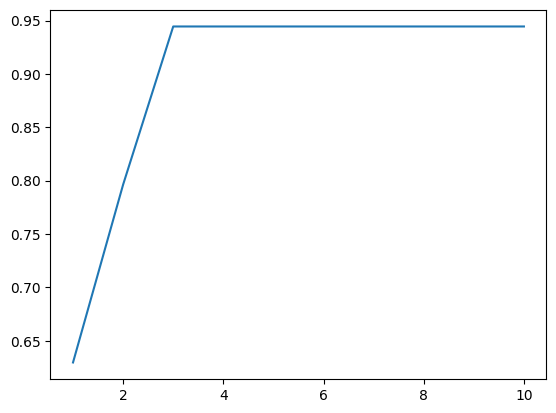

In [21]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(
        max_depth=i+1,
        splitter='random',
        criterion='entropy',
        random_state=30
    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)

plt.plot(range(1, 11), test)
plt.show()

### 重要属性和接口
- fit
- score
- apply：测试样本所在的叶子节点索引
- predict：：测试样本的分类/回归结果

In [22]:
clf.apply(Xtest)

array([ 8, 19, 19, 19, 15, 15, 19,  3, 19,  8, 22, 12, 19,  8,  8, 12, 19,
        8, 19, 19,  3, 12,  3,  8,  3, 19, 12, 12,  9, 19, 15, 12, 19, 19,
       19, 19,  9, 19,  8,  3,  3,  3, 15,  3, 12, 19, 19, 14,  3,  8,  3,
       19,  3, 12], dtype=int64)

In [23]:
clf.predict(Xtest)

array([1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1,
       2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 2, 0, 2, 1])

### 交叉验证
5个参数
- estimator
- X：不需要分训练/测试集
- Y：不需要分训练/测试集
- cv：交叉验证次数
- scoring

In [ ]:
#from sklearn.datasets import load_boston
#from sklearn.model_selection import cross_val_score

#boston = load_boston()
#regressor = tree.DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, cancer.data, cancer.target)

### 示例：回归树拟合正弦函数